<h1>Backtest common trading strategies</h1>

In [ ]:
%pip install backtrader
%matplotlib inline

import matplotlib.pyplot as plt
import backtrader as bt
from utils import *
import IPython.display as display
plt.rcParams['figure.figsize'] = [10, 8]


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


999961.7031999993
1000020.0731999993


<IPython.core.display.Javascript object>

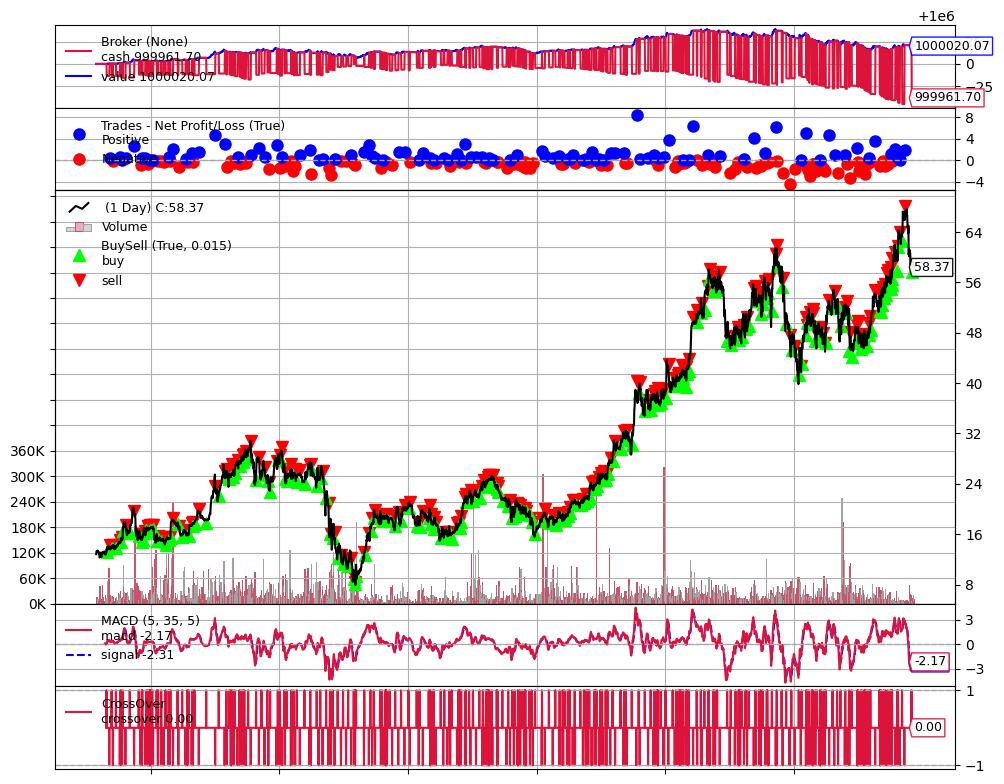

In [41]:
class MACDStrategy(bt.Strategy):
    params = (
        ('fast', 5),
        ('slow', 35),
        ('signal', 5),
    )

    def __init__(self):
        macd = bt.ind.MACD(
            self.data.close,
            period_me1=self.p.fast,
            period_me2=self.p.slow,
            period_signal=self.p.signal
        )
        self.macd = macd.macd
        self.signal = macd.signal
        self.crossover = bt.ind.CrossOver(self.macd, self.signal)

    def next(self):
        if not self.position and self.crossover > 0:
            self.buy()
        elif self.crossover < 0:
            self.sell()

cerebro = bt.Cerebro()
data = bt.feeds.PandasData(dataname=stock_dfs[0])

cerebro.adddata(data)
cerebro.addstrategy(MACDStrategy)
cerebro.broker.set_cash(10 ** 6) 

cerebro.run()
print(cerebro.broker.get_cash())
print(cerebro.broker.get_value())
figs = cerebro.plot(figsize=(10, 8))
fig = figs[0][0]  
display.display(fig)  